### CS4423 - Networks
Prof. Götz Pfeiffer<br />
School of Mathematics, Statistics and Applied Mathematics<br />
NUI Galway

#### 6. Power Laws and Scale-Free Graphs

# Lecture 21:  Power Laws

Random graphs have degree distributions that the the form of a binomial distribution, 
or, as the number of nodes increases, by a Poisson distribution.  Here,
most nodes in the graph have a degree that is equal or close to the average node degree of 
the graph. The probability that a node has a degree that is much higher than the average degree
is so small that it can be neglected.

In real world networks, such as the WWW, the neural network that ithe brain of C. Elegans,
citation networks, protein interaction networks and many more, it has been obserevd that there
are nodes of extremely high degree, compared to the average degree.  Their number is small, but
not negligible.  The degree distibution of such a network is better described by a **power law**.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

## Degree Distribution

Recall the **degree distribution** of a random graph:

The **degree distribution** of an undirected graph $G = (X, E)$
is the function $k \mapsto p_k:= n_k/n$,
where $n = |X|$ and $n_k$ is the number of nodes of degree $k$
(and thus $p_k$ is the probability that a random node $x \in X$
has degree $k$).

In an ensemble of graphs of order $n$, one sets $p_k:= \overline{n_k}/n$,
where $\overline{n_k}$ is the expected value of the random variable $n_k$
over the ensemble of graphs.

In this sense, the degree distribution in a random $G(n, p)$ graph is **binomial** :
$$
p_k = \binom{n-1}{k}p^k (1-p)^{n-1-k},
$$
or, in the limit $n \to \infty$ and $p \to 0$ with $np$ constant, it is a **Poisson distribution**:
$$
p_k = e^{-z} \frac{z^k}{k!},
$$
where $z = np$.

A power law degree distribution is strikingly different:

<div class="alert alert-warning">
    
A **power law** degree distribution has the form
$$
    p_k = c k^{-\gamma},
$$
for certain constants $c$ and $\gamma$.  (Typically $2 \leq \gamma \leq 3$.)
</div>

Of course, the constant $c$ needs to be chosen so that $\sum_k p_k = 1$.  For simplicity, let's assume that
$p_0 = 0$, i.e., that every node is connected to at least one other node, no node forms a disconnected singleton component.

Then, since $\sum_{k=1}^{\infty} k^{-\gamma} = \zeta(\gamma)$, where $\zeta$ is the infamous
[Riemann zeta function](https://en.wikipedia.org/wiki/Riemann_zeta_function), we get
$c = \zeta(\gamma)^{-1}$ and
$$
p_k = \frac{k^{-\gamma}}{\zeta(\gamma)}.
$$

The `scipy` package has a `zeta` function that can be used for plotting a graph over the domain of interest.

In [2]:
from scipy.special import zeta

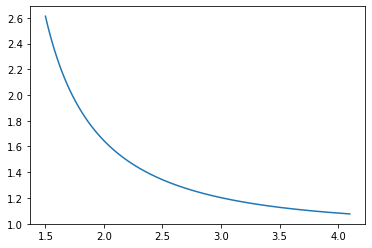

In [3]:
x = np.linspace(1.5, 4.1, 200)
plt.plot(x, zeta(x))

As a function of the real numbers, $\zeta(s)$ only converges for $s > 1$.
Specific values include
*  $\zeta(2) = \pi^2/6 \approx 1.6449$,
* $\zeta(4) = \pi^4/90 \approx 1.0823$.

In the limit, $\zeta(s) \to 1$ as $s \to \infty$.

Let's plot a binomial/Poisson distribution again some power law degree distribution.

In [4]:
def binomial(n, k):
    prd, top, bot = 1, n, 1
    for i in range(k):
        prd = (prd * top) // bot
        top, bot = top - 1, bot + 1
    return prd

In [5]:
def b_dist(n, p, k):
    return binomial(n, k) * p**k * (1-p)**(n-k)

In [6]:
from math import exp, factorial
def p_dist(l, k):
    return exp(-l) * l**k / factorial(k)

The specific values of $n = 1000$ and $p = 0.015$ correspond to a random graph with
$n = 1000$ nodes and $m = 7493$ edges.  Here, the average degree is $2m/n \approx 15$.

In [7]:
n, p = 1000, 0.015
domain = range(3, 53)
l = p * (n-1)
bb = [b_dist(n-1, p, k) for k in domain]
pp = [p_dist(l, k) for k in domain]

We already know that the binomial distribution and the Poisson distribution with these
parameters are almpst identical

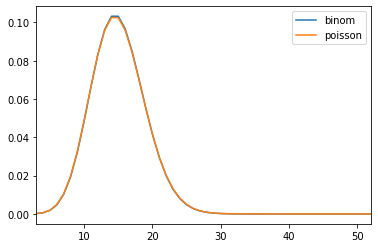

In [8]:
df = pd.DataFrame(index=domain)
df['binom'] = bb
df['poisson'] = pp
df.plot()

In [9]:
def power_dist(c, gamma, k):
    return c * k**(-gamma)

In [10]:
c = 0.15
po1 = [power_dist(zeta(1.5), 1.5, k) for k in domain]
po2 = [power_dist(zeta(2), 2, k) for k in domain]
po3 = [power_dist(zeta(3), 3, k) for k in domain]

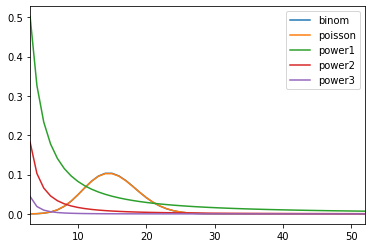

In [11]:
df['power1'] = po1
df['power2'] = po2
df['power3'] = po3
df.plot()

The difference between the two types of distributions become even more apparent in a [log-log plot](https://en.wikipedia.org/wiki/Log%E2%80%93log_plot).

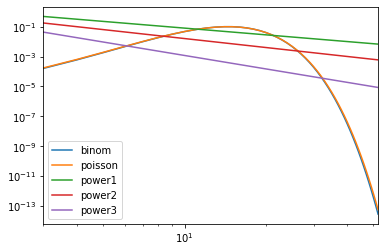

In [12]:
df.plot(loglog=True)

Note how the power laws appear as **straight lines** in this plot.  Why?

## The Brain of Worm

Let `G` be the neural network that is the brain of C.Elegans.

In [13]:
G = nx.read_pajek("data/c_elegans_undir.net")
G = nx.Graph(G)

In [14]:
n, m = G.number_of_nodes(), G.number_of_edges()
n, m

(279, 2287)

Let `R` be a random graph of the same degree $n$ and size $m$.  Both `G` and `R`
have average nide degree $16.4$.

In [15]:
R = nx.gnm_random_graph(n, m)

`R` has a binomial/Poisson degree distribution.

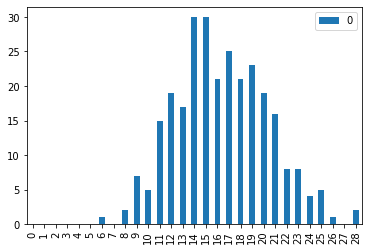

In [16]:
pd.DataFrame(nx.degree_histogram(R)).plot.bar()

Whereas `R` hasn't.  There definitely are some nodes of extremely high degree.

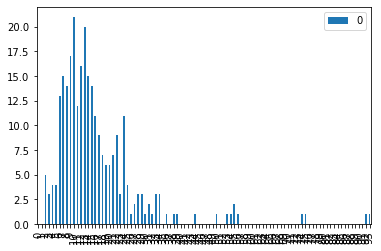

In [17]:
pd.DataFrame(nx.degree_histogram(G)).plot.bar()

A $(n, d, p)$-Watts-Strogatz graph has $n$ nodes and  $dn$ edges.  Let `W` be a Watts-Strogatz graph
with about the same number of nodes and edges.

In [18]:
d = m//n
p = 0.2
W = nx.watts_strogatz_graph(n, 2*d, p)

In [19]:
W.number_of_nodes(), W.number_of_edges()

(279, 2232)

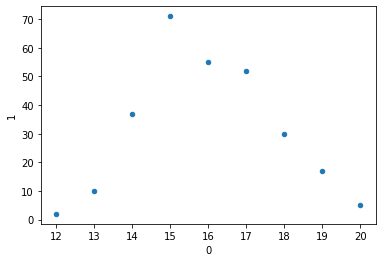

In [20]:
hist = nx.degree_histogram(W)
hist = [(i, hist[i]) for i in range(len(hist)) if hist[i] > 0]
df = pd.DataFrame(hist)
df.plot.scatter(x = 0, y = 1)

It doesn't look like the degree distribution of `W` follows a power law ...

Does the degree histogram of the worm brain network
follow a power law degree distribution?
Here is a standard plot and a loglog plot of it ...

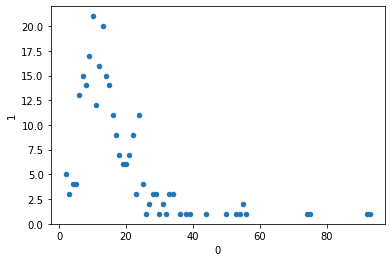

In [21]:
hist = nx.degree_histogram(G)
hist = [(i, hist[i]) for i in range(len(hist)) if hist[i] > 0]
df = pd.DataFrame(hist)
df.plot.scatter(x = 0, y = 1)

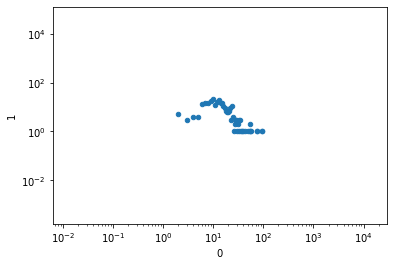

In [22]:
df.plot.scatter(x = 0, y = 1, loglog=True)

Identifying a power-law behaviour, in particular extracting the exponent $\gamma$ can be very tricky.
It somehow requires fitting a straight line into the loglog plot of the degree distribution,
paying special attention to the large values of $k$ ...

## Code Corner

### `matplotlib`

* `pyplot.plot`: [[tutorial]](https://matplotlib.org/tutorials/introductory/pyplot.html)

### `scipy`

* `special.zeta`: [[doc]](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.zeta.html)

## Exercises

1. Try and plot a straight line into the loglog plot of the degree distribution of the
worm brain network, in such a way that it illustrates the underlying power law.

1. More about Power Law degree distributions can be found in Chapter 5 of the book.
Read through that chapter.